# Boston House Prices Dataset

The **Boston Housing Dataset** is derived from information collected by the U.S. Census Service concerning housing in the area of Boston, MA.  
The following describes the dataset columns:

- **CRIM** — per capita crime rate by town  
- **ZN** — proportion of residential land zoned for lots over 25,000 sq.ft.  
- **INDUS** — proportion of non-retail business acres per town  
- **CHAS** — Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
- **NOX** — nitric oxides concentration (parts per 10 million)  
- **RM** — average number of rooms per dwelling  
- **AGE** — proportion of owner-occupied units built prior to 1940  
- **DIS** — weighted distances to five Boston employment centres  
- **RAD** — index of accessibility to radial highways  
- **TAX** — full-value property-tax rate per \$10,000  
- **PTRATIO** — pupil-teacher ratio by town  
- **B** — 1000(Bk − 0.63)² where Bk is the proportion of Black residents by town  
- **LSTAT** — % lower status of the population  
- **MEDV** — median value of owner-occupied homes in \$1000’s

In [1]:
!pip install scikit-learn==1.7.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 86.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.2 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [3]:
boston = pd.read_csv("/kaggle/input/bostonhousepricedata/Boston-house-price-data.csv")

In [4]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Exploratory Data Analysis

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# Summarizing stats of data
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Check missing values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Skewness

In [8]:
skewness_all_features = boston.skew()
print("Skewness of all numeric features:")
print(skewness_all_features)

Skewness of all numeric features:
CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64


## Correlation

In [9]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


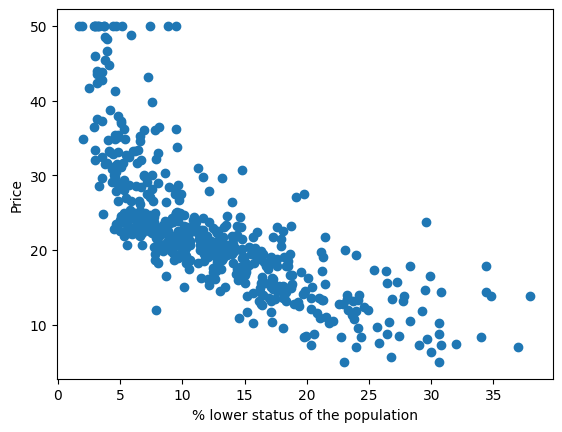

In [10]:
plt.scatter(boston['LSTAT'], boston['MEDV'])
plt.xlabel("% lower status of the population")
plt.ylabel("Price")
plt.show()

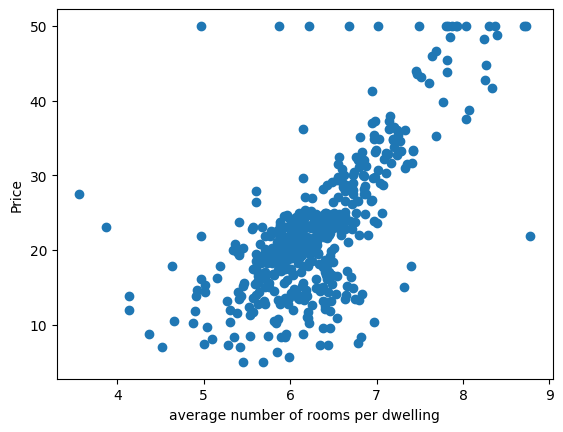

In [11]:
plt.scatter(boston['RM'], boston['MEDV'])
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Price")
plt.show()

<Axes: xlabel='LSTAT', ylabel='MEDV'>

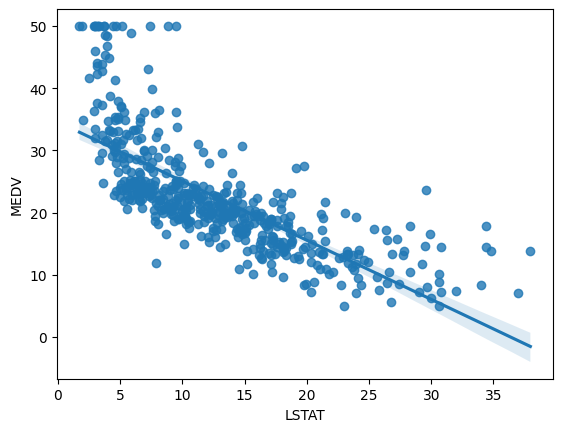

In [12]:
sns.regplot(x='LSTAT', y='MEDV', data=boston)

<Axes: xlabel='RM', ylabel='MEDV'>

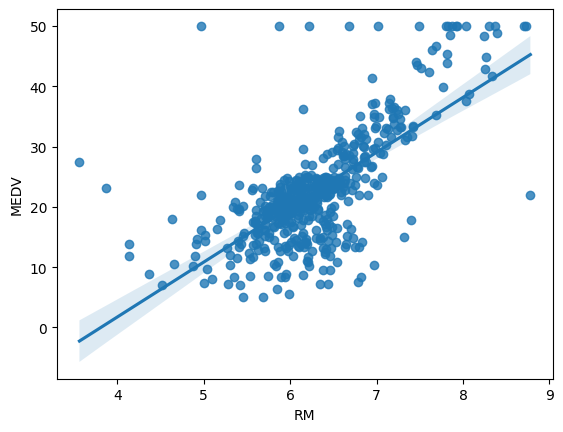

In [13]:
sns.regplot(x='RM', y='MEDV', data=boston)

# Preprocessing

## Separating Independent and Dependent features

In [14]:
X = boston.iloc[:,:-1]
y = boston.iloc[:,-1]

## Feature Engineering

### Log tranformations for skewed features

In [15]:
X["LSTAT"] = np.log(X["LSTAT"])
X["CRIM"] = np.log1p(X["CRIM"])

### Polynomial Features
for non-linear relationships

In [16]:
X["RM_squared"] = X["RM"]**2

### Feature Combinations

In [17]:
X["RM_LSTAT"] = X["RM"] * X["LSTAT"]

In [18]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RM_squared,RM_LSTAT
0,0.006300,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,1.605430,43.230625,10.555702
1,0.026944,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,2.212660,41.229241,14.207492
2,0.026924,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,1.393766,51.624225,10.014211
3,0.031857,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,1.078410,48.972004,7.546710
4,0.066770,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,1.673351,51.079609,11.959441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.060747,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,2.269028,43.467649,14.959704
502,0.044275,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,2.206074,37.454400,13.501174
503,0.058986,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,1.729884,48.664576,12.067671
504,0.103991,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,1.868721,46.158436,12.696087


## Train Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Standardize the data

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Pickling the scaler

In [21]:
pickle.dump(scaler, open("boston_scaler.pkl", "wb"))

# Model Training

## Hyperparameter Tuning

In [22]:
# 1. Ridge Regression with GridSearch
ridge_params = {'alpha': [0.1, 1, 10, 50, 100, 200, 500]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train_scaled, y_train)
ridge_best = ridge_grid.best_estimator_
print(f"   Best alpha: {ridge_grid.best_params_['alpha']}")

# 2. Lasso Regression with GridSearch
lasso_params = {'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5]}
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train_scaled, y_train)
lasso_best = lasso_grid.best_estimator_
print(f"   Best alpha: {lasso_grid.best_params_['alpha']}")

# 3. ElasticNet with GridSearch
elastic_params = {'alpha': [0.01, 0.1, 1, 5], 'l1_ratio': [0.3, 0.5, 0.7, 0.9]}
elastic_grid = GridSearchCV(ElasticNet(max_iter=10000), elastic_params, cv=5, scoring='r2', n_jobs=-1)
elastic_grid.fit(X_train_scaled, y_train)
elastic_best = elastic_grid.best_estimator_
print(f"   Best params: {elastic_grid.best_params_}")

# 4. Random Forest with constraints to prevent overfitting
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [4, 6, 8]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1, verbose=0)
rf_grid.fit(X_train_scaled, y_train)
rf_best = rf_grid.best_estimator_
print(f"   Best params: {rf_grid.best_params_}")

# 5. Gradient Boosting with strong regularization
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [4, 6, 8],
    'subsample': [0.8, 0.9, 1.0]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=5, scoring='r2', n_jobs=-1, verbose=0)
gb_grid.fit(X_train_scaled, y_train)
gb_best = gb_grid.best_estimator_

   Best alpha: 1
   Best alpha: 0.1
   Best params: {'alpha': 0.01, 'l1_ratio': 0.3}
   Best params: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [23]:
models = {
    'Ridge': ridge_best,
    'Lasso': lasso_best,
    'ElasticNet': elastic_best,
    'Random Forest': rf_best,
    'Gradient Boosting': gb_best
}

In [24]:
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    adjusted_test_r2 = 1 - (1 - test_r2)*((len(y_test) - 1)/(len(y_test) - X_test_scaled.shape[1] - 1))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae = mean_absolute_error(y_test, y_pred_test)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    results[name] = {
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Adjusted Test R²': adjusted_test_r2,
        'CV R² Mean': cv_scores.mean(),
        'CV R² Std': cv_scores.std(),
        'RMSE': rmse,
        'MAE': mae
    }
    
    print(f"\n{name}:")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Test R²:  {test_r2:.4f}")
    print(f"Adjusted Test R²: {adjusted_test_r2:.4f}")
    print(f"CV R² (5-fold): {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")


Ridge:
Train R²: 0.8188
Test R²:  0.8158
Adjusted Test R²: 0.7955
CV R² (5-fold): 0.7621 (+/- 0.1115)
RMSE: 3.7048
MAE:  2.4093

Lasso:
Train R²: 0.8076
Test R²:  0.7897
Adjusted Test R²: 0.7665
CV R² (5-fold): 0.7627 (+/- 0.0970)
RMSE: 3.9588
MAE:  2.5783

ElasticNet:
Train R²: 0.8163
Test R²:  0.8088
Adjusted Test R²: 0.7878
CV R² (5-fold): 0.7625 (+/- 0.1056)
RMSE: 3.7742
MAE:  2.4767

Random Forest:
Train R²: 0.9190
Test R²:  0.8322
Adjusted Test R²: 0.8137
CV R² (5-fold): 0.7822 (+/- 0.1156)
RMSE: 3.5363
MAE:  2.2113

Gradient Boosting:
Train R²: 0.9721
Test R²:  0.8698
Adjusted Test R²: 0.8555
CV R² (5-fold): 0.8384 (+/- 0.0946)
RMSE: 3.1145
MAE:  2.0545


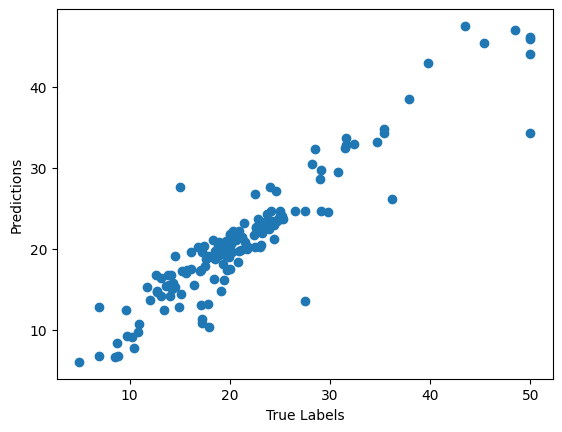

In [25]:
best_model = models['Gradient Boosting']
y_pred = best_model.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.show()

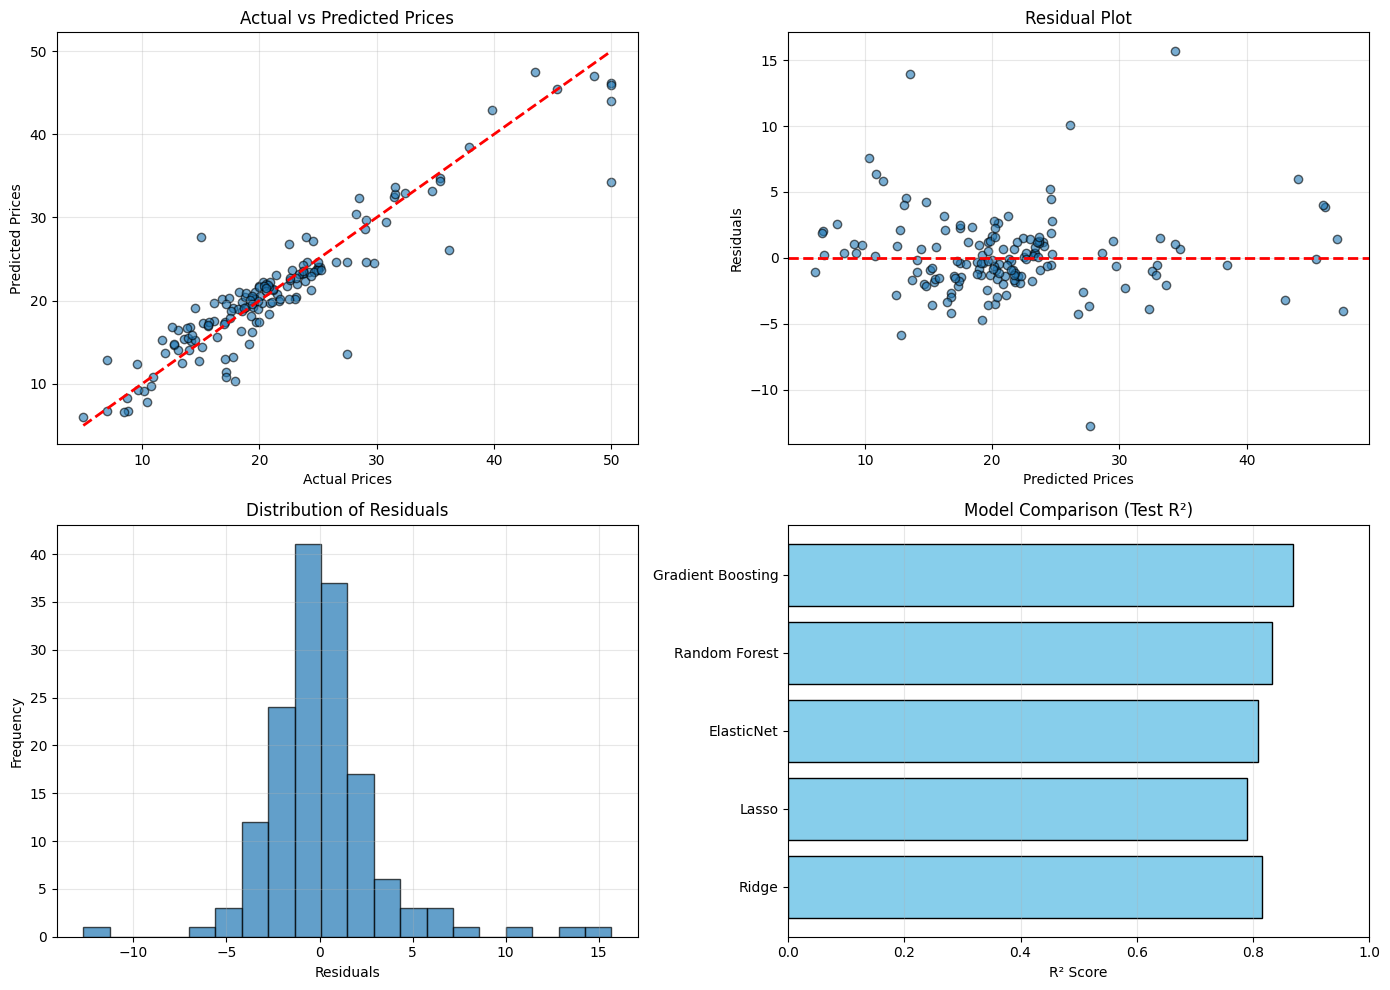

In [26]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2)
axes[0, 0].set_xlabel('Actual Prices')
axes[0, 0].set_ylabel('Predicted Prices')
axes[0, 0].set_title('Actual vs Predicted Prices')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals plot
residuals = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Prices')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals distribution
axes[1, 0].hist(residuals, bins=20, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].grid(True, alpha=0.3)

# 4. Model comparison
model_names = list(results.keys())
test_r2_scores = [results[name]['Test R²'] for name in model_names]

axes[1, 1].barh(model_names, test_r2_scores, color='skyblue', edgecolor='black')
axes[1, 1].set_xlabel('R² Score')
axes[1, 1].set_title('Model Comparison (Test R²)')
axes[1, 1].set_xlim(0, 1)
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

TOP 10 MOST IMPORTANT FEATURES
   feature  importance
     LSTAT    0.415810
        RM    0.226639
RM_squared    0.162138
       DIS    0.069707
       NOX    0.030129
   PTRATIO    0.023667
      CRIM    0.018486
       TAX    0.014889
       AGE    0.013014
         B    0.011785


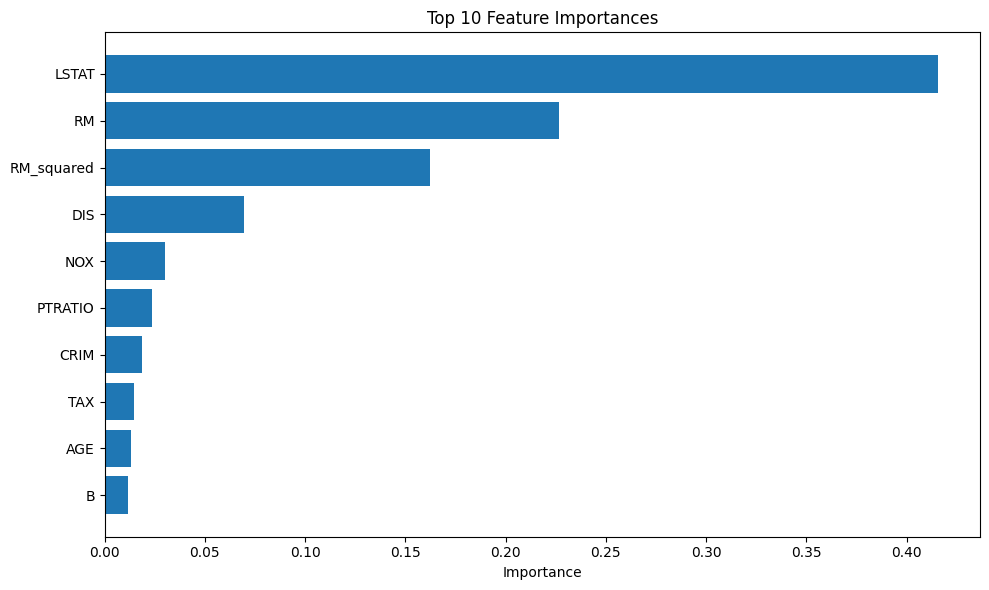

In [27]:
# Features Importance
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("TOP 10 MOST IMPORTANT FEATURES")
    print(feature_importance.head(10).to_string(index=False))
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'][:10], 
             feature_importance['importance'][:10])
    plt.xlabel('Importance')
    plt.title('Top 10 Feature Importances')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [28]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

## Predictions

In [29]:
best_model.predict(scaler.transform(np.array(X.iloc[0]).reshape(1, -1)))

array([27.60084753])

# Pickling model file for Deployment

In [30]:
pickle.dump(best_model, open("best_model.pkl", "wb"))
pickled_model = pickle.load(open("best_model.pkl", "rb"))
pickled_model.predict(scaler.transform(np.array(X.iloc[2]).reshape(1, -1)))

array([33.18752134])